In [5]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import os
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
import matplotlib.pylab as plt
print("TF version:", tf.__version__)
print("Hub version:", hub.__version__)
print("GPU is", "available" if tf.test.is_gpu_available() else "NOT AVAILABLE")
import tensorflow.compat.v2 as tf
import tensorflow_hub as hub
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.image as mpimg
from tensorflow.keras.utils import Sequence

TF version: 2.2.0
Hub version: 0.8.0
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
GPU is available


In [6]:
url = '/content/drive/My Drive/all_bird_data/unzipped_CUB_200_2011/CUB_200_2011'
PATH = os.path.join(os.path.dirname(url), 'CUB_200_2011')
print(PATH)

/content/drive/My Drive/all_bird_data/unzipped_CUB_200_2011/CUB_200_2011


In [7]:
train_data_dir = os.path.join((PATH), 'images')
print(train_data_dir)

test_data_dir = os.path.join((PATH), 'val')
print(test_data_dir)

print(len(test_data_dir))

/content/drive/My Drive/all_bird_data/unzipped_CUB_200_2011/CUB_200_2011/images
/content/drive/My Drive/all_bird_data/unzipped_CUB_200_2011/CUB_200_2011/val
76


In [8]:
batch_size = 50
IMG_HEIGHT = 224
IMG_WIDTH = 224

In [9]:
train_image_generator = ImageDataGenerator(rescale=1./255)

train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory=train_data_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

Found 2589 images belonging to 50 classes.


In [10]:
test_image_generator = ImageDataGenerator(rescale=1./255)

test_data_gen = test_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory=test_data_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

Found 300 images belonging to 50 classes.


In [26]:
labels_file = open("/content/classes.txt", 'r')
labels = labels_file.read()
labels_array = np.array(labels)

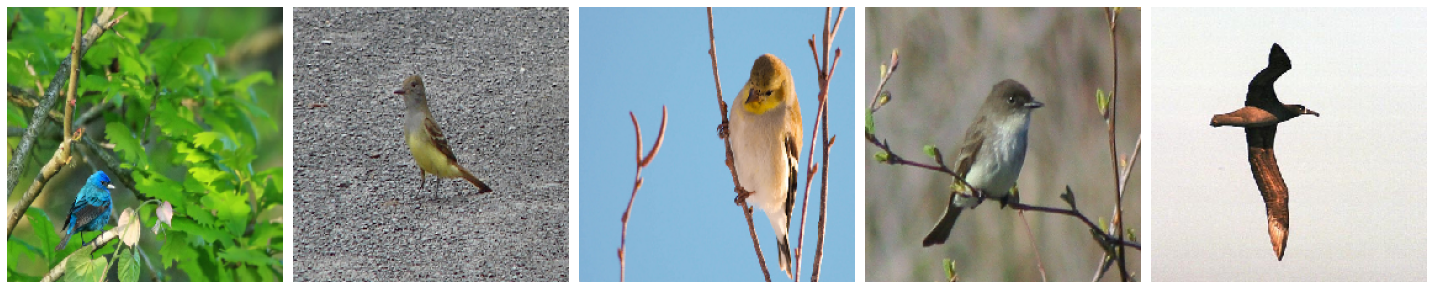

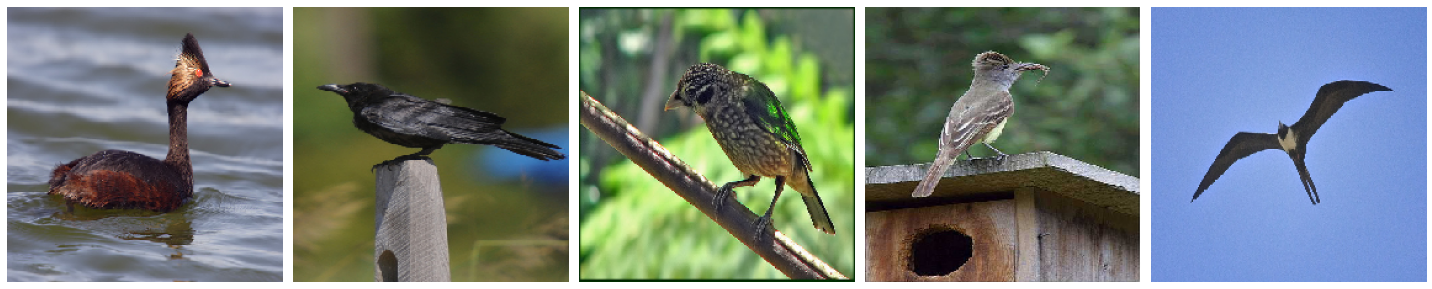

In [27]:
sample_data_train, sample_labels_train = next(train_data_gen)
sample_data_test, sample_labels_test = next(test_data_gen

def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

plotImages(sample_data_train[:5])
plotImages(sample_data_test[:5])


In [35]:
model = Sequential([
    Conv2D(500, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Conv2D(500, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(500, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(500, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(500, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(128, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(1, activation='relu'),
    tf.keras.layers.Softmax(axis = 1),
   # Dense(50)
])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 224, 224, 500)     14000     
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 112, 112, 500)     0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 112, 112, 500)     2250500   
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 56, 56, 500)       0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 56, 56, 500)       2250500   
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 28, 28, 500)       0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 28, 28, 500)      

In [36]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [38]:

history = model.fit(
    train_data_gen,
    sample_labels_train,
    batch_size=5,
    epochs=15,
    steps_per_epoch = 50,
    validation_data = test_data_gen
)

ValueError: ignored

In [21]:
pwd

'/content'